### 필요한 모델 임포트

In [12]:
import torch
from torch import nn
from torchdyn.models import NeuralODE
import matplotlib.pyplot as plt
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

### 초기값, 시간범위 지정

In [13]:
# 중력 가속도
g = 9.81

# 초기 위치와 속도
h0 = 10.0
v0 = 5.0

# 시간 범위
t_span = torch.linspace(0, 1, 100)


### FINN + NeuralODE 적용한 신경망 모델

In [14]:
class ODEFunc(nn.Module):
    def forward(self, t, y):
        x, y, z, vx, vy, vz = torch.split(y,1,dim=1)
        dxdt = vx
        dydt = vy
        dzdt = vz
        dvxdt = torch.zeros_like(x)
        dvydt = torch.zeros_like(y)
        dvzdt = -g * torch.ones_like(z)
        return torch.cat((dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt), dim=1)



# 신경망 모델
neural_ode = NeuralODE(ODEFunc(), sensitivity='autograd', solver='dopri5')

# 초기 조건
y0 = torch.tensor([[h0, h0, h0, v0/sqrt(2), v0/sqrt(2), v0]])


# 시뮬레이션
trajectory = neural_ode.trajectory(y0, t_span).detach()


Your vector field does not have `nn.Parameters` to optimize.


### 결과 그래프로 도출

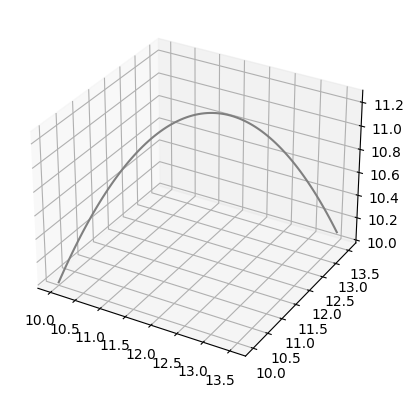

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 텐서를 numpy로 변환하였다.
ax.plot(trajectory[:, 0, 0].numpy(), trajectory[:, 0, 1].numpy(), trajectory[:, 0, 2].numpy(), 'gray')
plt.show()
